# **TikTok (Case-Study)**

# **Build a regression model**

### **1a. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [1]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay 

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

### **2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
data.dropna(inplace=True)
data.isnull().sum().sum()

0

Check for and handle duplicates.

In [9]:
# Check for duplicates
data.duplicated().sum()

0

Check for and handle outliers.

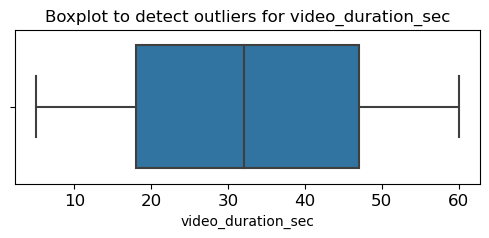

In [10]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_duration_sec', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_duration_sec'])
plt.show()

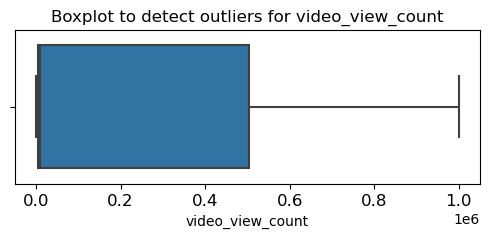

In [11]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_view_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_view_count'])
plt.show()

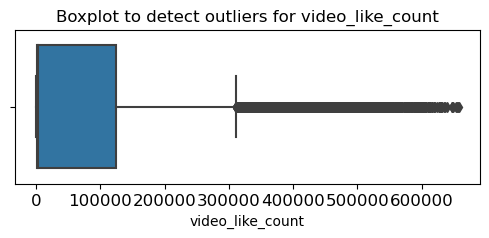

In [12]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_like_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_like_count'])
plt.show()

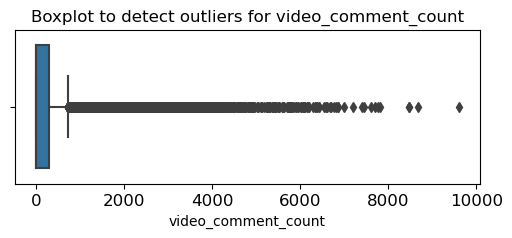

In [13]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_comment_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_comment_count'])
plt.show()

In [14]:
# Check for and handle outliers for video_like_count
q1 = data["video_like_count"].quantile(.25)
q3 = data["video_like_count"].quantile(.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
data.loc[data["video_like_count"] < lower_bound, "video_like_count"] = lower_bound
data.loc[data["video_like_count"] > upper_bound, "video_like_count"] = upper_bound

Check class balance.

In [15]:
# Check class balance for verified_status
data["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

Approximately 93.6% of the dataset represents videos posted by unverified accounts and 6.4% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable.

In [16]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                   replace=True,
                                   n_samples=len(data_majority),
                                   random_state=0)
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)
# Display new class counts
data_upsampled["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [17]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(str(text)) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [18]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_upsampled["video_transcription_length"] = data["video_transcription_text"].apply(func=lambda text: len(str(text)))


In [19]:
# Display first few rows of dataframe after adding new column
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128.0


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

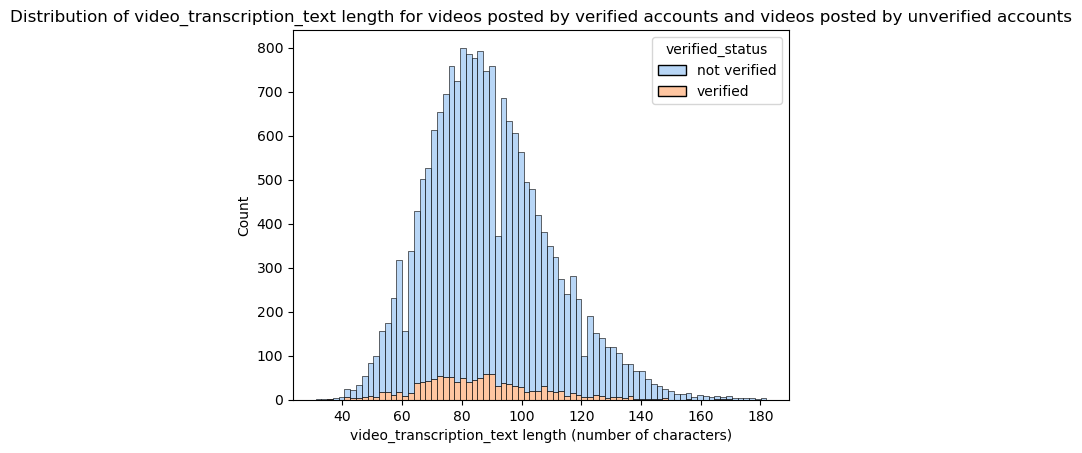

In [20]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="video_transcription_length", kde=False, palette="pastel", 
             hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

### **2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [21]:
# Code a correlation matrix to help determine most correlated variables
data_upsampled.drop(["#", "video_id"], axis=1, inplace=True)
data_upsampled.corr(numeric_only=True)

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_length
video_duration_sec,1.000000,0.013589,0.004494,0.002206,0.003989,-0.004586,-0.006121
video_view_count,0.013589,1.000000,0.856937,0.711313,0.690048,0.583485,0.230661
video_like_count,0.004494,0.856937,1.000000,0.832146,0.805543,0.686647,0.201996
video_share_count,0.002206,0.711313,0.832146,1.000000,0.710117,0.620182,0.151912
video_download_count,0.003989,0.690048,0.805543,0.710117,1.000000,0.857679,0.157536
video_comment_count,-0.004586,0.583485,0.686647,0.620182,0.857679,1.000000,0.131251
video_transcription_length,-0.006121,0.230661,0.201996,0.151912,0.157536,0.131251,1.000000


Visualize a correlation heatmap of the data.

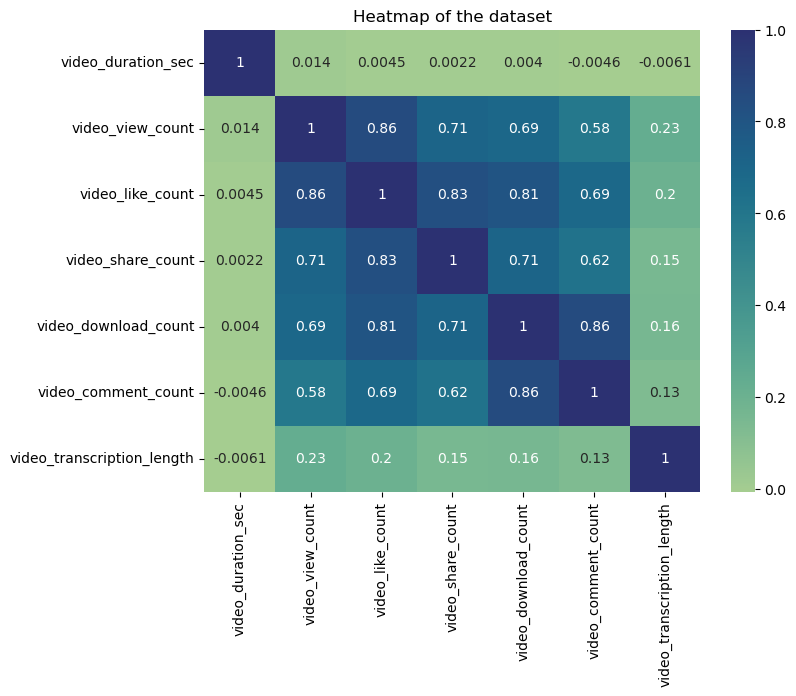

In [22]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    data_upsampled.corr(numeric_only=True), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

**Note!**: One of the model assumptions for logistic regression is no severe multicollinearity among the features.

### **3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [23]:
# Select outcome variable
y = data_upsampled["verified_status"]

Select the features.

In [24]:
# Select features
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

# Display first few rows of features dataframe
X.head()

NameError: name 'x' is not defined

### **3b. Train-test split**

Split the data into training and testing sets.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [ ]:
# Get shape of each training and testing set
print(f"X_train shape = {X_train.shape} - X_test shape = {X_test.shape}")
print(f"y_train shape = {y_train.shape} - y_test shape = {y_test.shape}")

### **3c. Encode variables**

Check the data types of the features.

In [ ]:
# Check data types
X_train.dtypes

In [ ]:
# Get unique values in `claim_status`
X_train.claim_status.unique()

In [ ]:
# Get unique values in `author_ban_status`
X_train.author_ban_status.unique()

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [ ]:
# Select the training features that needs to be encoded
cat_train = X_train[["claim_status", "author_ban_status"]]

# Display first few rows
cat_train.head()

In [ ]:
# Set up an encoder for one-hot encoding the categorical features
x_encoder = OneHotEncoder(drop="first", sparse_output=False)

In [ ]:
# Fit and transform the training features using the encoder
X_train_encoded = x_encoder.fit_transform(cat_train)

In [ ]:
# Get feature names from encoder
x_encoder.get_feature_names_out()

In [ ]:
# Display first few rows of encoded training features
X_train_encoded

In [ ]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=x_encoder.get_feature_names_out()) 

# Display first few rows
X_train_encoded_df

In [ ]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(["claim_status", "author_ban_status"], axis=1, inplace=True)
X_train.head()

In [ ]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df], axis=1)
# Display first few rows
X_train_final.head()

Check the data type of the outcome variable.

In [ ]:
# Check data type of outcome variable
y_train.dtype

In [ ]:
# Get unique values of outcome variable
y_train.unique()

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [ ]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop="first", sparse_output=False)

In [ ]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()
# Display the encoded training outcome variable
y_train_final

### **3d. Model building**

Construct a model and fit it to the training set.

In [ ]:
# Construct a logistic regression model and fit it to the training set
model = LogisticRegression().fit(X_train_final, y_train_final)

### **4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [ ]:
# Select the testing features that needs to be encoded
X_test_to_encoded = X_test[["claim_status", "author_ban_status"]]

# Display first few rows
X_test_to_encoded.head()

In [ ]:
# Transform the testing features using the encoder
X_test_encoded = x_encoder.transform(X_test_to_encoded)

# Display first few rows of encoded testing features
X_test_encoded

In [ ]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=x_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head()

In [ ]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(["claim_status", "author_ban_status"], axis=1, inplace=True)

In [ ]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [ ]:
# Use the logistic regression model to get predictions on the encoded testing set
predictions = model.predict(X_test_final)

Display the predictions on the encoded testing set.

In [ ]:
# Display the predictions on the encoded testing set
predictions

Display the true labels of the testing set.

In [ ]:
# Display the true labels of the testing set
y_test

Encode the true labels of the testing set so it can be compared to the predictions.

In [ ]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [ ]:
# Get shape of each training and testing set
print(f"X_train shape = {X_train_final.shape} - X_test shape = {X_test_final.shape}")
print(f"y_train shape = {y_train_final.shape} - y_test shape = {y_test_final.shape}")

### **4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

In [ ]:
# Compute values for confusion matrix
model_cm = confusion_matrix(y_test_final, predictions, labels=model.classes_)

# Create display of confusion matrix
cm_plot = ConfusionMatrixDisplay(confusion_matrix=model_cm, display_labels=model.classes_)

# Plot confusion matrix
cm_plot.plot()

# Display plot
plt.show();

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [ ]:
# Create a classification report
print(classification_report(y_test_final, predictions))

### **4c. Interpret model coefficients**

In [ ]:
model.coef_

In [ ]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame({"Feature Name": model.feature_names_in_, "Model Coeffecient": model.coef_[0]})